In [1]:
import pandas as pd
import numpy as np
from scipy import stats 
import math
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

/Users/kevinbateni/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df10=pd.read_html('https://en.wikipedia.org/wiki/2010_NFL_Draft')[6]
df11=pd.read_html('https://en.wikipedia.org/wiki/2011_NFL_Draft')[5]
df12=pd.read_html('https://en.wikipedia.org/wiki/2012_NFL_Draft')[5]
df13=pd.read_html('https://en.wikipedia.org/wiki/2013_NFL_Draft')[5]
df14=pd.read_html('https://en.wikipedia.org/wiki/2014_NFL_Draft')[5]
df15=pd.read_html('https://en.wikipedia.org/wiki/2015_NFL_Draft')[4]
df16=pd.read_html('https://en.wikipedia.org/wiki/2016_NFL_Draft')[4]
df17=pd.read_html('https://en.wikipedia.org/wiki/2017_NFL_Draft')[4]
df18=pd.read_html('https://en.wikipedia.org/wiki/2018_NFL_Draft')[4]
df19=pd.read_html('https://en.wikipedia.org/wiki/2019_NFL_Draft')[4]
df20=pd.read_html('https://en.wikipedia.org/wiki/2020_NFL_Draft')[4]

df10['Year'] = '2010'
df11['Year'] = '2011'
df12['Year'] = '2012'
df13['Year'] = '2013'
df14['Year'] = '2014'
df15['Year'] = '2015'
df16['Year'] = '2016'
df17['Year'] = '2017'
df18['Year'] = '2018'
df19['Year'] = '2019'
df20['Year'] = '2020'

comb_df = pd.concat([df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20], join="inner")

first_df = comb_df.loc[comb_df['Rnd.'] == '1' ]
first_df.reset_index()

first_df_cols = first_df[['Rnd.', 'NFL team', 'Pos.', 'College','Conf.','Year']]

piv_df = first_df_cols.pivot_table(
    index='College', columns = 'Year', values = 'Rnd.', aggfunc='count', 
    margins=True, margins_name='Total').sort_values(('Total'), ascending=False)

conf_piv_df = first_df_cols.pivot_table(
    index='Conf.', columns = 'Year', values = 'Rnd.', aggfunc='count', 
    margins=True, margins_name='Total').sort_values(('Total'), ascending=False)


In [20]:
piv_df.tail(30)

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total
College,,,,,,,,,,,,
Penn State,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2
Temple,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2
Utah,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2
Maryland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,2
Memphis,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2
NC State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,2
Texas Tech,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,2
Duke,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,2
Syracuse,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [14]:
comb_df

,Unnamed: 0,Rnd.,Pick #,NFL team,Player,Pos.,College,Conf.,Notes,Year
0,NaN,1,1.0,St. Louis Rams,Sam Bradford,QB,Oklahoma,Big 12,NaN,2010
1,NaN,1,2.0,Detroit Lions,Ndamukong Suh †,DT,Nebraska,Big 12,NaN,2010
2,NaN,1,3.0,Tampa Bay Buccaneers,Gerald McCoy †,DT,Oklahoma,Big 12,NaN,2010
3,NaN,1,4.0,Washington Redskins,Trent Williams †,OT,Oklahoma,Big 12,NaN,2010
4,NaN,1,5.0,Kansas City Chiefs,Eric Berry †,S,Tennessee,SEC,NaN,2010
...,...,...,...,...,...,...,...,...,...,...
251,NaN,7*,251.0,Seattle Seahawks,Stephen Sullivan,TE,LSU,SEC,from Miami [R7 - 24],2020
252,NaN,7*,252.0,Denver Broncos,Tyrie Cleveland,WR,Florida,SEC,NaN,2020
253,NaN,7*,253.0,Minnesota Vikings,Kyle Hinton,C,Washburn,MIAA,NaN,2020
254,NaN,7*,254.0,Denver Broncos,Derrek Tuszka,DE,North Dakota State,MVFC,NaN,2020


In [25]:
comb_df.describe

<bound method NDFrame.describe of      Unnamed: 0 Rnd.  Pick #              NFL team            Player Pos.  \
0           NaN    1     1.0        St. Louis Rams      Sam Bradford   QB   
1           NaN    1     2.0         Detroit Lions   Ndamukong Suh †   DT   
2           NaN    1     3.0  Tampa Bay Buccaneers    Gerald McCoy †   DT   
3           NaN    1     4.0   Washington Redskins  Trent Williams †   OT   
4           NaN    1     5.0    Kansas City Chiefs      Eric Berry †    S   
..          ...  ...     ...                   ...               ...  ...   
251         NaN   7*   251.0      Seattle Seahawks  Stephen Sullivan   TE   
252         NaN   7*   252.0        Denver Broncos   Tyrie Cleveland   WR   
253         NaN   7*   253.0     Minnesota Vikings       Kyle Hinton    C   
254         NaN   7*   254.0        Denver Broncos     Derrek Tuszka   DE   
255         NaN   7*   255.0       New York Giants       Tae Crowder   LB   

                College   Conf.          

In [56]:
new_df = conf_piv_df.head(2)

In [105]:
new_df_tp = new_df.T
new_df_tp.reset_index(inplace=True)

In [109]:
plot_new_df = new_df_tp

In [112]:
plot_new_df.drop([11], inplace=True)

In [76]:
new_df_tp['Diff'] = new_df_tp['Total'] - new_df_tp['SEC']
new_df_tp['SEC_Perc'] =  (new_df_tp['SEC'] / new_df_tp['Total']) * 100
new_df_tp.drop(['Total'], inplace=True)

In [77]:
new_df_tp.describe()

Conf.,Total,SEC,Diff,SEC_Perc
count,11.0,11.000000,11.000000,11.000000
mean,32.0,10.000000,22.000000,31.250000
std,0.0,2.408319,2.408319,7.525997
min,32.0,7.000000,17.000000,21.875000
25%,32.0,8.500000,20.500000,26.562500
50%,32.0,10.000000,22.000000,31.250000
75%,32.0,11.500000,23.500000,35.937500
max,32.0,15.000000,25.000000,46.875000


In [23]:
from scipy.stats import binom


prob = 1 - binom.cdf(7, 32, 0.3125)
prob1 = 1 - binom.cdf(10, 32, 0.3125)
prob2 = 1 - binom.cdf(15, 32, 0.3125)
prob3 = 1 - binom.cdf(16, 32, 0.3125)

print ("Probability of 7 picks: "+ (str(round(prob*100, 1))+"%"))
print ("Probability of 10 picks: "+ (str(round(prob1*100, 1))+"%"))
print ("Probability of 15 picks: "+ (str(round(prob2*100, 1))+"%"))
print ("Probability of 16 picks: "+ (str(round(prob3*100, 1))+"%"))

Probability of 7 picks: 82.9%
Probability of 10 picks: 41.5%
Probability of 15 picks: 2.1%
Probability of 16 picks: 0.8%


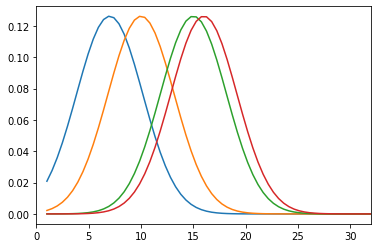

In [24]:
mu = 7
variance = 10
sigma = math.sqrt(variance)
x = np.linspace(1, 32, 64)
plt.plot(x,stats.norm.pdf(x, mu, sigma))

mu = 10
variance = 10
sigma = math.sqrt(variance)
x = np.linspace(1, 32, 64)
plt.plot(x,stats.norm.pdf(x, mu, sigma))

mu = 15
variance = 10
sigma = math.sqrt(variance)
x = np.linspace(1, 32, 64)
plt.plot(x,stats.norm.pdf(x, mu, sigma))

mu = 16
variance = 10
sigma = math.sqrt(variance)
x = np.linspace(1, 32, 64)
plt.plot(x,stats.norm.pdf(x, mu, sigma))

plt.xlim(0,32)
plt.show()

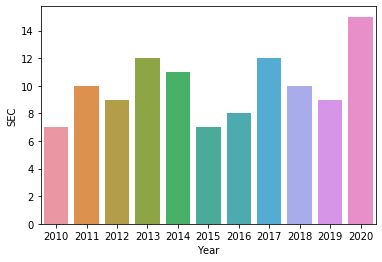

In [113]:
ax = sns.barplot(x="Year", y="SEC", data=plot_new_df)